**Support Vector Machine in Neural Network for Image Classification**

![SVM](https://www.analyticssteps.com/backend/media/thumbnail/338466/8680904_1588569086_SVM.jpg)



More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier

In Generally Support Vector Machine is an **complex Algorithm** to spliting the margin amaong the Best Fit Line among from the both class side it make the Bounder Line which classiifer the Boundary of an classes it can spaced from the various distance from the Best Fit Line 

Let I explain Clearly with an Example:


We are know countiers are divided by the border and convert the boundies areas are called as Country from each side of the Line. That the boundary line is called **Line of Control(LOC)** in Army.At the Same way in AI Support Vector Machine Algorithm can divided the classes from the Center of an boundary line in Dataset 


![Border](https://i.insider.com/5d3b140e100a2446f022ca82?width=700)

**Import the Requirement Lib**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

**Auto Selection of Accelerator (CPU / GPU / TPU)**

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

def auto_select_accelerator():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        print("Running on TPU:", tpu.master())
    except ValueError:
        strategy = tf.distribute.get_strategy()
    print(f"Running on {strategy.num_replicas_in_sync} replicas")

    return strategy

In [3]:
#checking the GPU we got from the Kaggle Kernal
!nvidia-smi



#checking the Tensorflow Version
tf.__version__

Thu Jan 27 11:30:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

'2.4.1'

**Pre-Processing the Data**

In [4]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

**Hyper Paramters**

In [5]:
training_set = train_datagen.flow_from_directory('../input/tomatoleaf/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/tomatoleaf/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


**Creating the Support Vector Machine Network**

**Support Vector Machine Math Concept**

In this Algorithm will divided the bounderies from the Realted Class Folders and it automatically created an Best fit Line Boundary with the 10 circle bounderies

![Math_Concept](https://miro.medium.com/max/1838/1*6mcff3dEDuTFT21IvlL1_Q.jpeg)

In [6]:
svm = tf.keras.models.Sequential()

# Step 1 - Convolution
svm.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[224, 224, 3]))

# Step 2 - Pooling
svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
svm.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
svm.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
svm.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
svm.add(tf.keras.layers.Dense(units=128, activation='relu'))

svm.add(Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])


svm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

**Optimizer and Loss Function**

In [7]:
svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
r=svm.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
313/313 [==============================] - 192s 595ms/step - loss: 1.2170 - accuracy: 0.3307 - val_loss: 1.0591 - val_accuracy: 0.6110
Epoch 2/10
313/313 [==============================] - 115s 367ms/step - loss: 1.0295 - accuracy: 0.7020 - val_loss: 1.0276 - val_accuracy: 0.6920
Epoch 3/10
313/313 [==============================] - 115s 368ms/step - loss: 1.0062 - accuracy: 0.7587 - val_loss: 1.0219 - val_accuracy: 0.6950
Epoch 4/10
313/313 [==============================] - 115s 368ms/step - loss: 0.9867 - accuracy: 0.8056 - val_loss: 0.9952 - val_accuracy: 0.7770
Epoch 5/10
313/313 [==============================] - 115s 368ms/step - loss: 0.9748 - accuracy: 0.8361 - val_loss: 0.9896 - val_accuracy: 0.7810
Epoch 6/10
313/313 [==============================] - 116s 369ms/step - loss: 0.9724 - accuracy: 0.8390 - val_loss: 1.0165 - val_accuracy: 0.7080
Epoch 7/10
313/313 [==============================] - 116s 369ms/step - loss: 0.9680 - accuracy: 0.8458 - val_loss: 0.9653 -

**Accuracy Graphs**

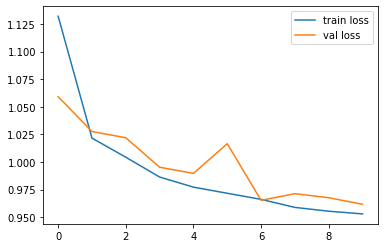

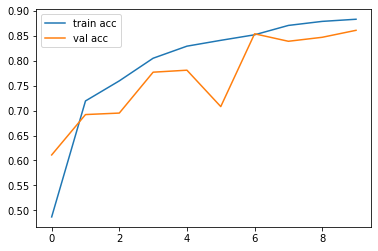

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Loading the model**

In [9]:
from tensorflow.keras.models import load_model

svm.save('SVM_Tomatoleaf.h5')

In [10]:
from tensorflow.keras.models import load_model
model = load_model('SVM_Tomatoleaf.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

**Testing the Model**

In [12]:

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/tomatoleaf/tomato/train/Tomato___Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = svm.predict(test_image)
result

array([[4.0120266e-02, 9.5804089e-01, 9.2027576e-06, 3.8090278e-07,
        3.3401101e-08, 3.5831836e-04, 1.3941439e-03, 1.1173570e-05,
        1.1742408e-09, 6.5504020e-05]], dtype=float32)